In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [28]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [29]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


In [31]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


<Axes: xlabel='ds'>

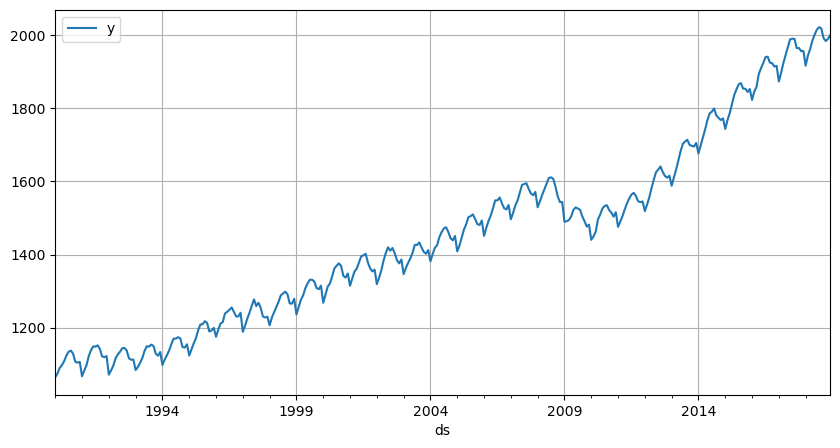

In [32]:
df.plot(x = 'ds', y = 'y', figsize = (10, 5), grid = True)

### Trend Analysis

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 12, freq = 'MS')
forecast = m.predict(future)

11:37:13 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
from prophet.plot import add_changepoints_to_plot

In [ ]:
'''
The red lines represent a significant change in trend over time.
'''
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Changing Seasonality

In [ ]:
df = pd.read_csv('../Data/airline_passengers.csv')

In [ ]:
df.head()

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
m_add = Prophet()
m_add.fit(df)
future_add = m_add.make_future_dataframe(periods = 50, freq = 'MS')
forecast_add = m_add.predict(future_add)

In [ ]:
fig = m_add.plot(forecast_add)
'''
Note how the black datapoints do not align with the forecasted blue lines. 
This means the seasonlity is multipicative and not additive.
'''

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
from prophet.plot import add_changepoints_to_plot

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change Seasonality to Multiplicative (prophet assumes additive by default)

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods = 50, freq = 'MS')
forecast = m.predict(future)

In [ ]:
fig = m.plot(forecast)
'''
Note how the datapoints are aligned much better now after changing the seasonality component to multiplicative.
'''

### Evaluation